# 🌍 Global COVID-19 Data Analysis
This project analyzes COVID-19 global trends using the dataset from [Our World In Data](https://ourworldindata.org/covid-cases).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='darkgrid')


In [6]:
# Load CSV file
df = pd.read_csv('owid-covid-data.csv')

# Check column names
print("Available columns:", df.columns.tolist())

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Display sample
df.head()


Available columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_pe

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [7]:
#CLEANING AND FILTERING DATA
# Convert 'date' column to datetime
# Only include countries of interest
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

# Keep selected columns (verify they exist)
columns = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
           'people_vaccinated', 'population']
available_cols = [col for col in columns if col in df.columns]

df = df[available_cols].copy()

# Fill NaNs with 0 for numeric data
df[available_cols[2:]] = df[available_cols[2:]].fillna(0)

df.head()


,location,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,population
173549,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,1417173120
173550,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,1417173120
173551,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,1417173120
173552,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,1417173120
173553,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,1417173120


## 📊 Descriptive Statistics
Let's compute the basic descriptive statistics for key metrics.


In [8]:
# Describe numeric columns
df.describe()


,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,population
count,5030,5.030000e+03,5.030000e+03,5.030000e+03,5030.000000,5.030000e+03,5.030000e+03
mean,2022-04-21 20:06:06.441351936,3.148922e+07,2.958701e+04,3.868204e+05,344.428827,2.448624e+08,6.044581e+08
min,2020-01-05 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,5.402748e+07
25%,2021-02-27 00:00:00,3.382900e+05,0.000000e+00,5.678000e+03,0.000000,0.000000e+00,5.402748e+07
50%,2022-04-22 00:00:00,1.724525e+07,0.000000e+00,2.717450e+05,0.000000,0.000000e+00,3.382899e+08
75%,2023-06-15 00:00:00,4.500218e+07,0.000000e+00,5.336220e+05,0.000000,2.671745e+08,1.417173e+09
max,2024-08-12 00:00:00,1.034368e+08,5.650933e+06,1.193165e+06,28982.000000,1.027439e+09,1.417173e+09
std,NaN,3.608338e+07,2.062604e+05,4.096105e+05,1924.793770,3.870986e+08,5.876613e+08


In [34]:
# Group by country and get mean total cases
mean_cases = df_filtered.groupby('location')['total_cases'].mean()
mean_cases


Series([], Name: total_cases, dtype: float64)

## 📈 Visualizing COVID-19 Trends
We'll now visualize trends using line charts, bar plots, histograms, and scatter plots.


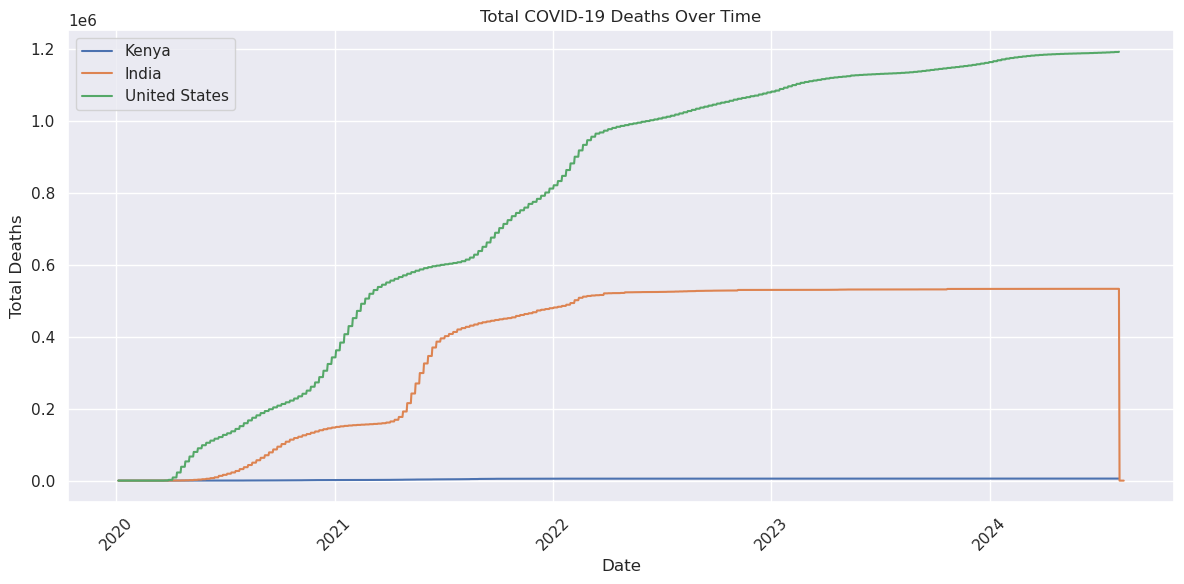

In [10]:
import matplotlib.pyplot as plt

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Select countries
countries = ['Kenya', 'India', 'United States']

# Plot total deaths over time for each country
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()




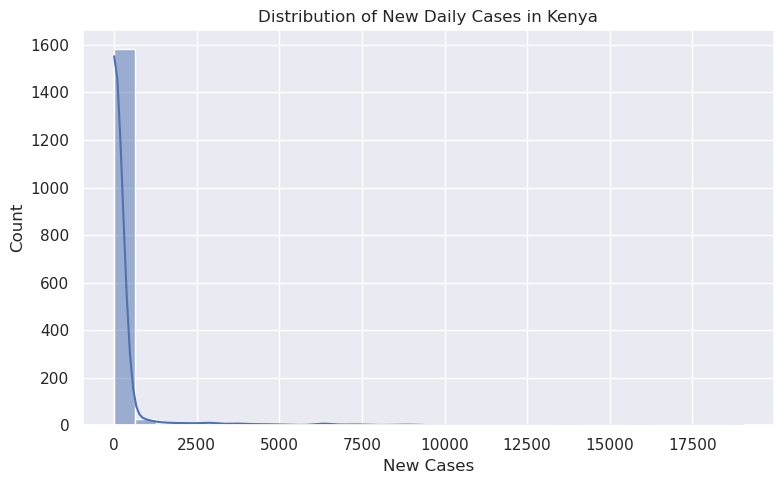

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['location'] == 'Kenya']['new_cases'], bins=30, kde=True)
plt.title("Distribution of New Daily Cases in Kenya")
plt.xlabel("New Cases")
plt.tight_layout()
plt.show()



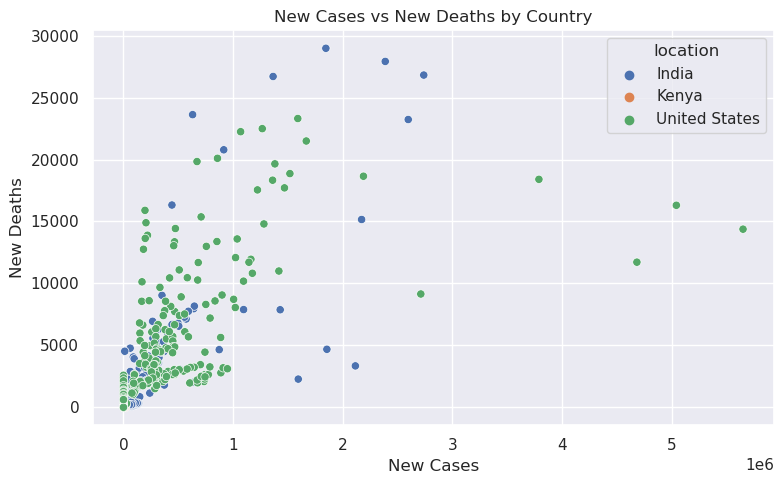

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="new_cases", y="new_deaths", hue="location")
plt.title("New Cases vs New Deaths by Country")
plt.xlabel("New Cases")
plt.ylabel("New Deaths")
plt.tight_layout()
plt.show()


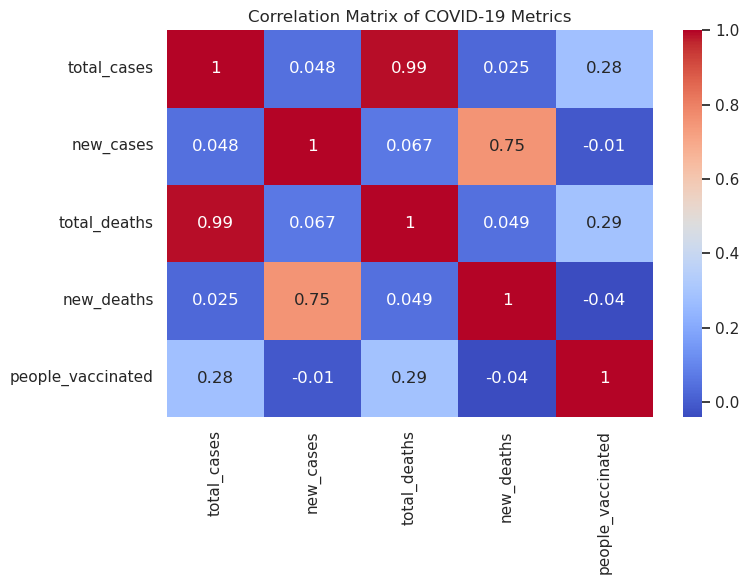

In [14]:
metrics = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'people_vaccinated']
metrics = [col for col in metrics if col in df.columns]

plt.figure(figsize=(8,6))
corr = df[metrics].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of COVID-19 Metrics")
plt.tight_layout()
plt.show()



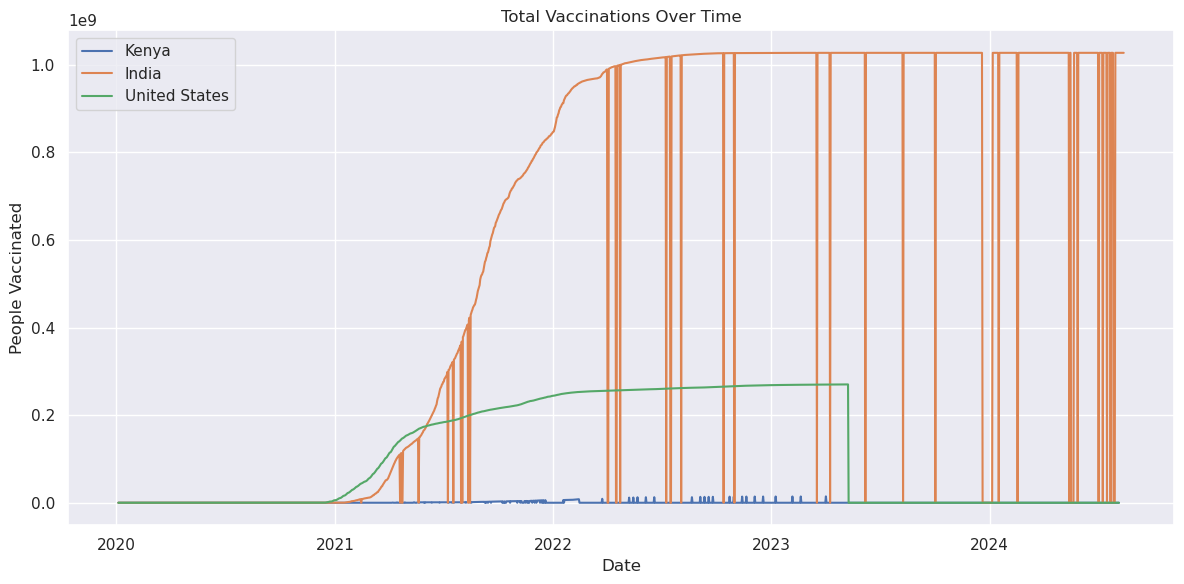

In [15]:
# Cell: Total Vaccinations Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(pd.to_datetime(country_data['date']), country_data['people_vaccinated'], label=country)

plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


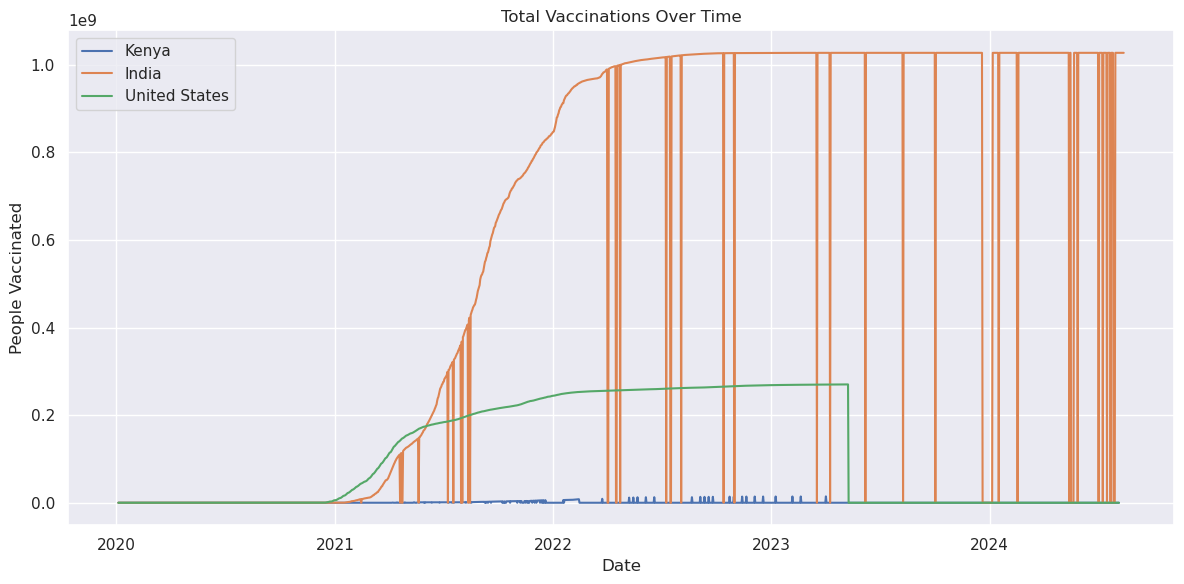

In [17]:
# Cell: Total Vaccinations Over Time
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(pd.to_datetime(country_data['date']), country_data['people_vaccinated'], label=country)

plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## 🔍 Insights
Our analysis provides a comparative view of the COVID-19 pandemic’s progression and response in Kenya, India, and the United States. Differences in case counts, death tolls, and vaccination rates reveal varied pandemic dynamics influenced by population size, healthcare infrastructure, and public health policies.nya.

